In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
shakes_df = pd.read_csv('./shakespeare-plays/Shakespeare_data.csv')

In [5]:
shakes_df.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"


In [8]:
shakes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [12]:
shakes_df.Player.unique()

array([nan, 'KING HENRY IV', 'WESTMORELAND', 'FALSTAFF', 'PRINCE HENRY',
       'POINS', 'EARL OF WORCESTER', 'NORTHUMBERLAND', 'HOTSPUR',
       'SIR WALTER BLUNT', 'First Carrier', 'Ostler', 'Second Carrier',
       'GADSHILL', 'Chamberlain', 'BARDOLPH', 'PETO', 'First Traveller',
       'Thieves', 'Travellers', 'LADY PERCY', 'Servant', 'FRANCIS',
       'Vintner', 'Hostess', 'Sheriff', 'Carrier', 'MORTIMER',
       'GLENDOWER', 'EARL OF DOUGLAS', 'Messenger', 'VERNON', 'WORCESTER',
       'ARCHBISHOP OF YORK', 'SIR MICHAEL', 'LANCASTER', 'BEDFORD',
       'GLOUCESTER', 'EXETER', 'OF WINCHESTER', 'CHARLES', 'ALENCON',
       'REIGNIER', 'BASTARD OF ORLEANS', 'JOAN LA PUCELLE',
       'First Warder', 'Second Warder', 'WOODVILE', 'Mayor', 'Officer',
       'Boy', 'SALISBURY', 'TALBOT', 'GARGRAVE', 'GLANSDALE', 'Sergeant',
       'First Sentinel', 'BURGUNDY', 'Sentinels', 'Soldier', 'Captain',
       'OF AUVERGNE', 'Porter', 'PLANTAGENET', 'SUFFOLK', 'SOMERSET',
       'WARWICK', 'Lawye

In [13]:
# Based on initial observation, I assume that it is necessary to discard the rows that have no Player data
# This is because we don't want our model to learn NaN as an answer
# The model should only answer concrete characters in the play

In [14]:
# Now I want to see what type of data there are in the rows that NaN in Player
# I want to do this to see which data I would lose if I drop these rows

In [17]:
shakes_df[shakes_df.Player.isna()]

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
2015,2016,Henry IV,10.0,NaN,NaN,Eastcheap. The Boar's-Head Tavern.
2016,2017,Henry IV,10.0,NaN,NaN,Enter FALSTAFF and BARDOLPH
29459,29460,Cymbeline,7.0,2.2.55,NaN,An ante-chamber adjoining Imogen's apartments.
29460,29461,Cymbeline,7.0,NaN,NaN,Enter CLOTEN and Lords


In [18]:
# So far I believe that I should drop all of these rows, they do not provide any useful data to guessing the character
# If we do this then we drop all the rows in PlayerLineNumber that are NaN too

In [19]:
# Now I want to see which kind of data there is in the rows that have NaN values for ActSceneLine 
# Maybe there is something useful there to predict the character
# I still want to make sure that there isn't a lot of NaN values for Players within this subset of the dataframe

In [24]:
shakes_df[shakes_df.ActSceneLine.isna() & shakes_df.Player.isna()]

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,NaN,ACT I
1,2,Henry IV,NaN,NaN,NaN,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,NaN,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
2015,2016,Henry IV,10.0,NaN,NaN,Eastcheap. The Boar's-Head Tavern.
2016,2017,Henry IV,10.0,NaN,NaN,Enter FALSTAFF and BARDOLPH
29460,29461,Cymbeline,7.0,NaN,NaN,Enter CLOTEN and Lords


In [25]:
# There are only 5 NaN Players within this subset, therefore I will leave the ActSceneLine nan rows in its place

In [29]:
shakes_df.dropna(subset=['Player'], inplace=True)

In [30]:
# Might want to drop the Dataline column entirely since it doesn't provide any value
# Also it would be useful to hotshot encode the Play 
# For this we would need to find out how many plays there are

shakes_df.Play.unique()

In [34]:
shakes_corr = shakes_df.corr()

In [36]:
mask = np.zeros_like(shakes_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

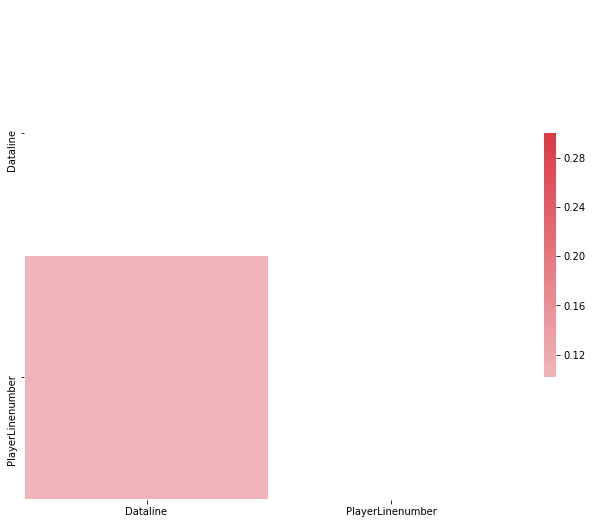

In [38]:
f, ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(shakes_corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [39]:
# At this point, plotting a correlation graph is not useful at all, I need to fix the data more
# Some ideas that I have are to get the PlayerLine length for a column and also the amount of words in each line.
# Also to perform some sort of oneshot enconding in the Play column
# I still need to come up with ways how to take advantage of the PlayerLineNumber and the ActSceneLineNumber columns
# Maybe some sentiment analysis on the line column would help a lot
# If there would be a way to extract special words each character uses, that would help a ton more, I need to figure out if I can do this

In [41]:
shakes_df.head(10)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
8,9,Henry IV,1.0,1.1.6,KING HENRY IV,Shall daub her lips with her own children's bl...
9,10,Henry IV,1.0,1.1.7,KING HENRY IV,"Nor more shall trenching war channel her fields,"
10,11,Henry IV,1.0,1.1.8,KING HENRY IV,Nor bruise her flowerets with the armed hoofs
11,12,Henry IV,1.0,1.1.9,KING HENRY IV,"Of hostile paces: those opposed eyes,"
12,13,Henry IV,1.0,1.1.10,KING HENRY IV,"Which, like the meteors of a troubled heaven,"


In [42]:
# I will remove the Dataline column since it provides no meaningful information

In [48]:
shakes_df.drop(columns=['Dataline'], inplace=True)

In [49]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [53]:
shakes_df.reset_index(drop=True, inplace=True)

In [58]:
# After resetting the index I want to add a column that contains the length of each PlayerLine

In [54]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
1,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
2,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
3,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
4,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [57]:
shakes_df['LineLength'] = shakes_df.PlayerLine.apply(len)

In [59]:
# I will review what the dataframe looks like after performing the operation
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength
0,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38
1,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42
2,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46
3,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39
4,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41


In [61]:
shakes_df.dtypes

Play                 object
PlayerLinenumber    float64
ActSceneLine         object
Player               object
PlayerLine           object
LineLength            int64
dtype: object

In [64]:
# What unique values are there in PlayerLinenumber?
shakes_df.PlayerLinenumber.unique()

array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.,
        12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,  22.,
        23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,  33.,
        34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,  44.,
        45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,  55.,
        56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,  66.,
        67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,  77.,
        78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,  88.,
        89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99.,
       100., 101., 102., 103., 104., 105., 106., 107., 108., 109., 110.,
       111., 112., 113., 114., 115., 116., 117., 118., 119., 120., 121.,
       122., 123., 124., 125., 126., 127., 128., 129., 130., 131., 132.,
       133., 134., 135., 136., 137., 138., 139., 140., 141., 142., 143.,
       144., 145., 146., 147., 148., 149., 150., 15

In [67]:
# All of the unique values in PlayerLinenumber are integers that are in str form
# Therefore, I will cast them to int form
shakes_df.PlayerLinenumber = shakes_df.PlayerLinenumber.apply(int)

In [68]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41


In [69]:
# I want to create a new column that holds the sentiment of each row in the PlayerLine

import nltk

In [70]:
sentence = 'So shaken as we are, so wan with care,'

In [75]:
tokens = nltk.word_tokenize(sentence)

In [76]:
tokens

['So', 'shaken', 'as', 'we', 'are', ',', 'so', 'wan', 'with', 'care', ',']

In [77]:
# We can use work_tokenize function from nltk to count the amount of words that each character has
# I think that the amount of word each character has should make a difference

In [79]:
len(tokens)

11

In [81]:
shakes_df['WordCount'] = shakes_df.PlayerLine.apply(nltk.word_tokenize).apply(len)

In [83]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength,WordCount
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38,11
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42,10
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46,7
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39,8
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41,8


In [84]:
# Ok, this looks good. Now I want to analyze the sentiment of each line.
# I will analyze it into three categories: positive, negative and neutral.

In [86]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()

In [89]:
sia.polarity_scores('No more the thirsty entrance of this soil')

{'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'compound': -0.296}

In [90]:
# With a similar strategy I can attempt to get the sentiment analysis of each line

In [93]:
sa_results = shakes_df.PlayerLine.apply(sia.polarity_scores)

In [94]:
sa_results.head()

0    {'neg': 0.132, 'neu': 0.581, 'pos': 0.287, 'co...
1    {'neg': 0.202, 'neu': 0.504, 'pos': 0.294, 'co...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.239, 'neu': 0.761, 'pos': 0.0, 'comp...
Name: PlayerLine, dtype: object

In [96]:
sa_results[0]['neg']

0.132

In [97]:
sa_results = pd.DataFrame.from_records(sa_results)

In [98]:
sa_results.head()

,compound,neg,neu,pos
0,0.4349,0.132,0.581,0.287
1,0.2732,0.202,0.504,0.294
2,0.0000,0.000,1.000,0.000
3,0.0000,0.000,1.000,0.000
4,-0.2960,0.239,0.761,0.000


In [100]:
sa_results['Sentiment'] = 0
sa_results.loc[sa_results['compound'] > 0.2, 'Sentiment'] = 1
sa_results.loc[sa_results['compound'] < -0.2, 'Sentiment'] = -1

In [101]:
sa_results.head()

,compound,neg,neu,pos,Sentiment
0,0.4349,0.132,0.581,0.287,1
1,0.2732,0.202,0.504,0.294,1
2,0.0000,0.000,1.000,0.000,0
3,0.0000,0.000,1.000,0.000,0
4,-0.2960,0.239,0.761,0.000,-1


In [103]:
shakes_df.LineSent = sa_results.Sentiment.copy()

In [104]:
shakes_df.head()

,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,LineLength,WordCount,LineSent
0,Henry IV,1,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",38,11,1
1,Henry IV,1,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",42,10,1
2,Henry IV,1,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,46,7,0
3,Henry IV,1,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,39,8,0
4,Henry IV,1,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,41,8,-1


In [105]:
# I want to look at a histogram of the line sentiment to know if it makes any difference

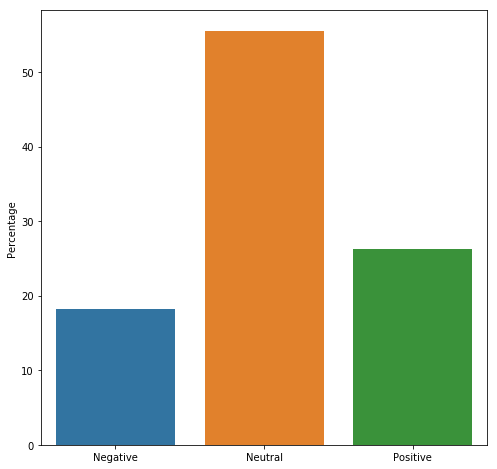

In [106]:
fig, ax = plt.subplots(figsize=(8,8))

counts = shakes_df.LineSent.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

In [109]:
# Almost 60% of the sentiment is neutral, which might not be too useful
# However, we can still keep this feature since it's not too bad
# My guess is that the nltk algortihm isn't calibrated for the english that shakespear uses
# Another thing to consider is the range that we used to determine
# the sentiment based on the compound sentiment
# If we expand this range then we can get better distributed plot
# Also, nltk uses a general lexicon to classiify text, if we can
# find a more specific lexicon to shakespeare's era english then we can
# perform a better guess of the sentiment